In [ ]:
# Import required Libraries 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# download problem data 
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-03-18 13:04:22--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-03-18 13:04:22 (34.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
# read csv file and save data 
data = pd.read_csv('moore.csv', header=None)
data.head

<bound method NDFrame.head of         0            1
0    1971         2300
1    1972         3500
2    1973         2500
3    1973         2500
4    1974         4100
..    ...          ...
157  2017  18000000000
158  2017  19200000000
159  2018   8876000000
160  2018  23600000000
161  2018   9000000000

[162 rows x 2 columns]>

In [ ]:
# create input and target data 
data_arr = data.values
x = data_arr[:,0].reshape(-1,1)
y = data_arr[:,1]

In [ ]:
x.shape

(162, 1)

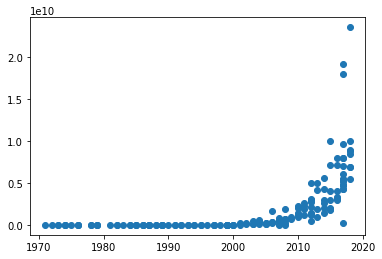

In [ ]:
# plot data in scatter plot
plt.scatter(x,y)

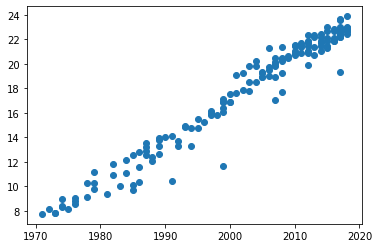

In [ ]:
# we change it into linear relation 
y = np.log(y)
# replot 
plt.scatter(x,y)

In [ ]:
# we scale date x data 
# we can use standard scaler but we try with substracting from mean
x = x - x.mean()

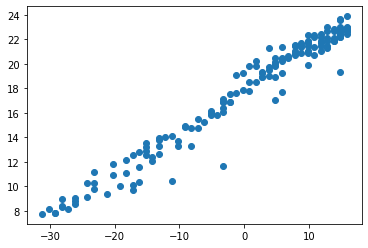

In [ ]:
plt.scatter(x,y)

In [ ]:
###### building the tf dense model
model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(1,)),
            tf.keras.layers.Dense(1)
])

# WE USE SGD for this problem and specify lr and momentum 
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr): 
  if epoch >= 30: 
    return 0.00001
  else: 
    return 0.001

schedular = tf.keras.callbacks.LearningRateScheduler(schedule)


r = model.fit(x, y, epochs=400, callbacks =[schedular])


Epoch 1/400
6/6 [==============================] - 1s 3ms/step - loss: 316.8824 - lr: 0.0010
Epoch 2/400
6/6 [==============================] - 0s 3ms/step - loss: 324.7812 - lr: 0.0010
Epoch 3/400
6/6 [==============================] - 0s 4ms/step - loss: 414.8844 - lr: 0.0010
Epoch 4/400
6/6 [==============================] - 0s 8ms/step - loss: 382.0049 - lr: 0.0010
Epoch 5/400
6/6 [==============================] - 0s 5ms/step - loss: 307.7514 - lr: 0.0010
Epoch 6/400
6/6 [==============================] - 0s 5ms/step - loss: 241.1117 - lr: 0.0010
Epoch 7/400
6/6 [==============================] - 0s 5ms/step - loss: 124.7733 - lr: 0.0010
Epoch 8/400
6/6 [==============================] - 0s 5ms/step - loss: 252.8159 - lr: 0.0010
Epoch 9/400
6/6 [==============================] - 0s 3ms/step - loss: 93.2770 - lr: 0.0010
Epoch 10/400
6/6 [==============================] - 0s 4ms/step - loss: 52.8657 - lr: 0.0010
Epoch 11/400
6/6 [==============================] - 0s 4ms/step - loss:

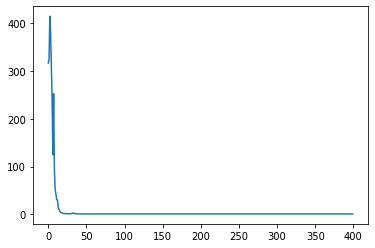

In [ ]:
plt.plot(r.history['loss'], label='train_loss')

In [ ]:
# get model weights 
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.33999902]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([17.663218], dtype=float32)>]


In [ ]:
# Regression Linear model has 2 vars representing straight line vars
# first weight is the slope 0.3222404 and b = 17.744345
# to acess the slope 
m = model.layers[0].get_weights()[0][0,0]
# we acess the model layers 
# we get hold of first dense layer (input layer is ignored)
# we get the array of weights of first layer 
# we acess the weight we want 

In [ ]:
m

0.33999902

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [ ]:
print("Time to double:", np.log(2) / m)

Time to double: 2.03867405369819


In [ ]:
# If you know the analytical solution
X = np.array(x).flatten()
Y = np.array(y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


In [ ]:
x

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086],
       [-26.19753086],
       [-24.19753086],
       [-24.19753086],
       [-23.19753086],
       [-23.19753086],
       [-23.19753086],
       [-21.19753086],
       [-20.19753086],
       [-20.19753086],
       [-19.19753086],
       [-18.19753086],
       [-18.19753086],
       [-17.19753086],
       [-17.19753086],
       [-17.19753086],
       [-16.19753086],
       [-16.19753086],
       [-16.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-14.19753086],
       [-14.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-12.19753086],
       [-11.19753086],
       [-11.19753086],
       [-10.19753086],
       [-10.19753086],
       [ -9

In [ ]:
# make predictions 
y_pred = model.predict(x).flatten()

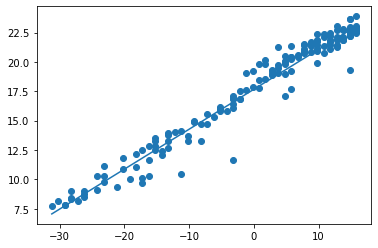

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred)